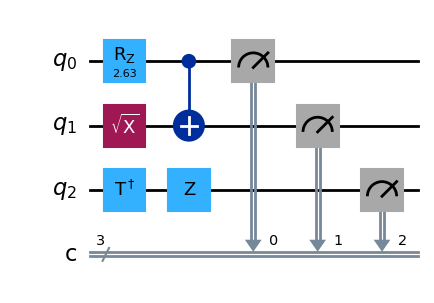

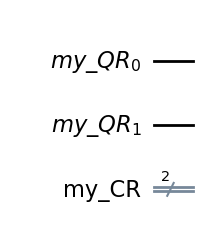

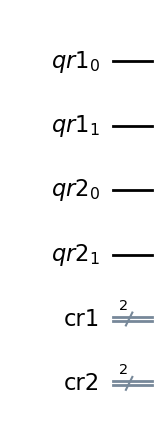

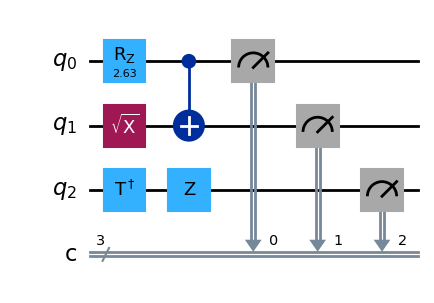

In [32]:
# Example 1: Named Registers in a Quantum Circuit
#--------------------------------------------------------
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.random import random_circuit
import matplotlib.pyplot as plt

%matplotlib inline 
qr_named = QuantumRegister(2, 'my_QR')
cr_named = ClassicalRegister(2, 'my_CR')
qc_named = QuantumCircuit(qr_named, cr_named)
qc_named.draw('mpl')

# Example 2: Two Circuits with Custom Labels
qr1 = QuantumRegister(2, name='qr1')
cr1 = ClassicalRegister(2, name='cr1')
qc1 = QuantumCircuit(qr1, cr1)

qr2 = QuantumRegister(2, name='qr2')
cr2 = ClassicalRegister(2, name='cr2')
qc2 = QuantumCircuit(qr2, cr2)

# Example 3: Concatenate the Two Circuits
qc_combined = QuantumCircuit()
qc_combined.add_register(qr1, qr2, cr1, cr2)
qc_combined.draw('mpl')

# Example 4: Generate a Random Circuit
qc_random = random_circuit(3, 2, measure=True)
qc_random.draw('mpl')


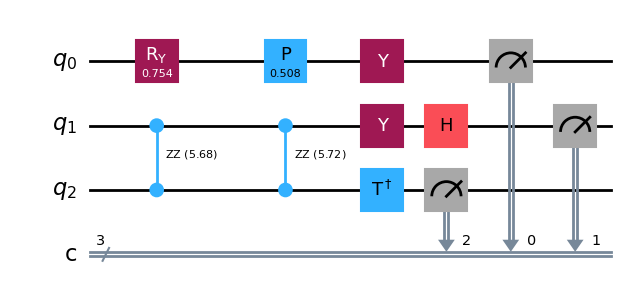

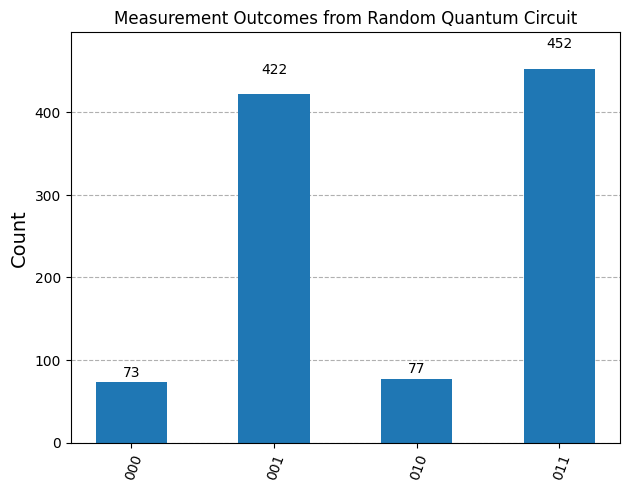

In [33]:
# PURPOSE:
# This script demonstrates how to generate a random quantum circuit using Qiskit.
# Random circuits are useful for testing hardware, learning about gate patterns,
# and benchmarking simulators. We'll simulate the circuit and display its result.
# -----------------------------------------------------------------------------

from qiskit.circuit.random import random_circuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline 
# -----------------------------------------------------------------------------
# Step 1: Create a random circuit
# - num_qubits = 3: the circuit will have 3 qubits
# - depth = 4: number of random gate layers ("moments")
#   → Each layer can contain single-qubit and multi-qubit (like CX) gates
# - measure = True: adds measurement operations to all qubits
# -----------------------------------------------------------------------------
qc = random_circuit(num_qubits=3, depth=4, measure=True)

# Step 2: Draw the generated circuit using matplotlib
qc.draw('mpl')
plt.show()

# -----------------------------------------------------------------------------
# Step 3: Simulate the circuit using QASM simulator (shot-based)
# -----------------------------------------------------------------------------
backend = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator (optimizes layout/gate set)
transpiled = transpile(qc, backend)

# Run the transpiled circuit 1024 times to collect statistics
job = backend.run(transpiled, shots=1024)
result = job.result()

# -----------------------------------------------------------------------------
# Step 4: Extract and plot measurement results as a histogram
# -----------------------------------------------------------------------------
counts = result.get_counts()
plot_histogram(counts)
plt.title("Measurement Outcomes from Random Quantum Circuit")
plt.show()


OrderedDict([('rxx', 1), ('ryy', 1), ('cu1', 1), ('ch', 1), ('cx', 1)])
OrderedDict([('t', 2), ('u2', 1), ('u3', 1), ('u1', 1), ('ry', 1), ('sx', 1), ('s', 1)])


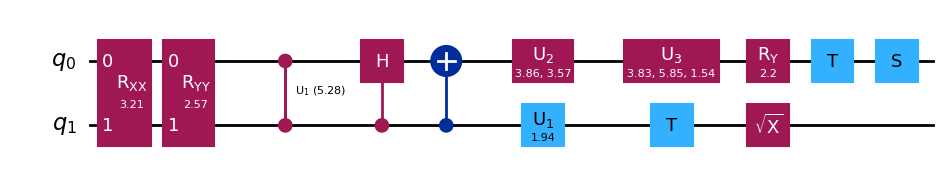

In [45]:
from qiskit.circuit.random import random_circuit
%matplotlib inline 
# Create two random 2-qubit circuits of different depths
qc1 = random_circuit(2, 5, max_operands=2, seed=45)
qc2 = random_circuit(2, 5, max_operands=2, seed=99)

# Compose them (join qc2 after qc1)
qc = qc1.compose(qc2, qubits=[0, 1])
qc.draw('mpl')

print(qc1.count_ops())
print(qc2.count_ops())


In [41]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ', width)
    print('Depth = ', depth)
    print('Circuit size = ', circuit_size)
    print('Number of operators = ', num_operators)
#--------------------------------------------------------
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)    

Width =  2
Depth =  6
Circuit size =  8
Number of operators =  OrderedDict([('t', 2), ('rxx', 1), ('ryy', 1), ('u2', 1), ('u3', 1), ('u1', 1), ('ry', 1)])


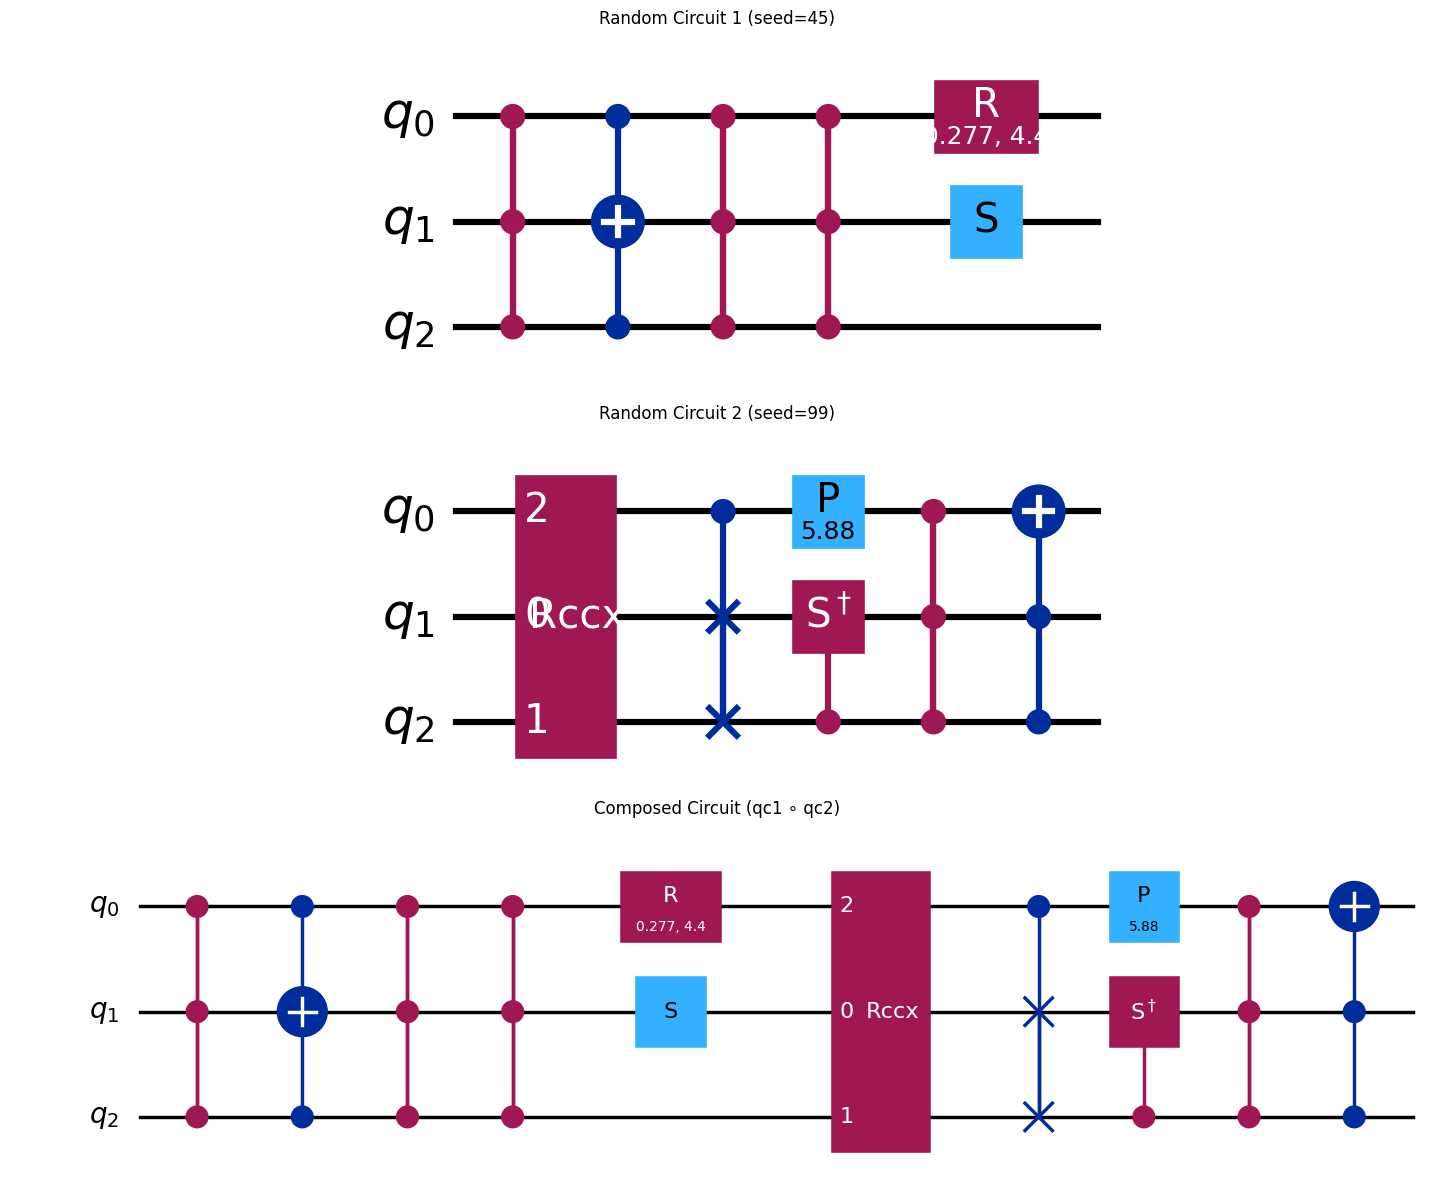

---- Gate Counts ----
Circuit 1: OrderedDict([('ccz', 3), ('ccx', 1), ('r', 1), ('s', 1)])
Circuit 2: OrderedDict([('rccx', 1), ('cswap', 1), ('csdg', 1), ('p', 1), ('ccz', 1), ('ccx', 1)])
Composed : OrderedDict([('ccz', 4), ('ccx', 2), ('r', 1), ('s', 1), ('rccx', 1), ('cswap', 1), ('csdg', 1), ('p', 1)])


In [51]:
# PURPOSE:
# This code demonstrates how to generate two random quantum circuits using Qiskit
# with different seeds and depths, visualize them, and compose them together
# into a larger circuit. It also compares the gate operations (count_ops).
# ------------------------------------------------------------------------------

from qiskit.circuit.random import random_circuit
import matplotlib.pyplot as plt
from matplotlib import gridspec

# --------------------------
# Step 1: Create Random Circuits
# --------------------------

# Create a random 3-qubit circuit with depth 5 and seed 45
qc1 = random_circuit(num_qubits=3, depth=5, seed=45)

# Create another random 3-qubit circuit with the same depth but a different seed
qc2 = random_circuit(num_qubits=3, depth=5, seed=99)

# The seed in random_circuit(...) controls the random number generator used to build the circuit.
# "Use a predictable random pattern that starts with seed 42." So every time you run this with seed=42, you’ll get the exact same circuit 
# same gates, in the same order.
# Changing the seed (e.g., from 42 to 99) will generate a different random circuit.

# --------------------------
# Step 2: Compose the Circuits
# --------------------------

# This means qc2 is appended after qc1 on the same set of qubits
qc_combined = qc1.compose(qc2)

# --------------------------
# Step 3: Visualize All Circuits
# --------------------------
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(3, 1)  # 3 rows for 3 subplots

# Draw first circuit
ax1 = fig.add_subplot(gs[0])
ax1.set_title("Random Circuit 1 (seed=45)")
qc1.draw(output='mpl', ax=ax1)

# Draw second circuit
ax2 = fig.add_subplot(gs[1])
ax2.set_title("Random Circuit 2 (seed=99)")
qc2.draw(output='mpl', ax=ax2)

# Draw composed circuit
ax3 = fig.add_subplot(gs[2])
ax3.set_title("Composed Circuit (qc1 ∘ qc2)")
qc_combined.draw(output='mpl', ax=ax3)

plt.tight_layout()
plt.show()

# --------------------------
# Step 4: Compare Circuit Properties
# --------------------------
print("---- Gate Counts ----")
print("Circuit 1:", qc1.count_ops())
print("Circuit 2:", qc2.count_ops())
print("Composed :", qc_combined.count_ops())


In [52]:
#Define function to print circuit properties:
def print_circuit_props(qc):
    width = qc.width()
    depth = qc.depth()
    num_operators = qc.count_ops()
    circuit_size = qc.size()
    print('Width = ', width)
    print('Depth = ', depth)
    print('Circuit size = ', circuit_size)
    print('Number of operators = ', num_operators)
#--------------------------------------------------------
#Pass our quantum circuit to print out the circuit properties
print_circuit_props(qc)    

Width =  2
Depth =  10
Circuit size =  13
Number of operators =  OrderedDict([('t', 2), ('rxx', 1), ('ryy', 1), ('cu1', 1), ('ch', 1), ('cx', 1), ('u2', 1), ('u3', 1), ('u1', 1), ('ry', 1), ('sx', 1), ('s', 1)])
